In [32]:
# Detect labels in images

def detect_labels(rek, bucket, key, max_labels=10, min_confidence=90, region="eu-west-1"):
    response = rek.detect_labels(
        Image={
            "S3Object": {
                "Bucket": bucket,
                "Name": key,
            }
        },
        MaxLabels=max_labels,
        MinConfidence=min_confidence,
    )
    return response['Labels']


def detect_faces(rek, bucket, key, attributes=['ALL']):
    response = rek.detect_faces(
        Image={
            "S3Object": {
                "Bucket": bucket,
                "Name": key,
            }
        },
        Attributes=attributes,
    )
    return response['FaceDetails']


In [34]:
import boto3
import pprint
from IPython.display import Image

# Vars
rek = boto3.client('rekognition')
BUCKET = 'aws-ai'
KEY = 'images/swimmer.png'


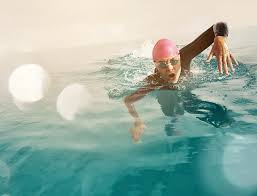

In [35]:
Image("https://s3.amazonaws.com/aws-ai/images/swimmer.png")


In [36]:
for label in detect_labels(rek, BUCKET, KEY):
    pprint.pprint("{Name} - {Confidence}%".format(**label))

'Diver - 97.14745330810547%'
'Diving - 97.14745330810547%'
'Human - 97.14745330810547%'
'Person - 97.14745330810547%'
'Sport - 97.14745330810547%'
'Sports - 97.14745330810547%'
'Water - 97.14745330810547%'
'Swimming - 96.37855529785156%'


## Face Detection

In [37]:

for face in detect_faces(rek, BUCKET, KEY):
    print("  Face ({Confidence}%)".format(**face))
    # emotions
    for emotion in face['Emotions']:
        print("  {Type} : {Confidence}%".format(**emotion))
    # quality
    for quality, value in face['Quality'].items():
        print("  {quality} : {value}".format(quality=quality, value=value))
    # facial features
#     for feature, data in face.items():
# #         if feature not in FEATURES_BLACKLIST:
#             print("  {feature}({data[Value]}) : {data[Confidence]}%".format(feature=feature, data=data))


  Face (99.5625228881836%)
  ANGRY : 72.31179809570312%
  SURPRISED : 70.24728393554688%
  CONFUSED : 6.807428359985352%
  Brightness : 55.002140045166016
  Sharpness : 89.90251922607422
